In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df_train = pd.read_csv('/Users/ivana/Desktop/MUpraktikum-master/rešenja/poglavlje3/titanic_data.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending = False)
mising_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
mising_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [12]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'], inplace = True, axis = 1)

In [13]:
df_train.loc[df_train['Embarked'].isnull()].index

Int64Index([61, 829], dtype='int64')

In [16]:
df_train.drop([61, 829], inplace = True, axis = 0)

In [18]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)

In [20]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


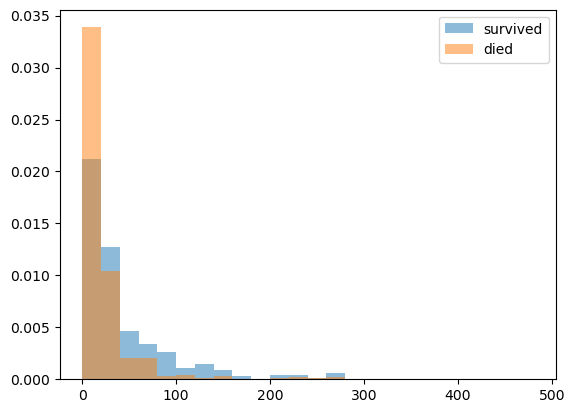

In [22]:
fare_survived = df_train.loc[df_train['Survived'] == 1, 'Fare']
fare_died = df_train.loc[df_train['Survived'] == 0, 'Fare']
plt.hist(fare_survived, bins = np.arange(0,500,20), alpha = 0.5, label = 'survived', density = True)
plt.hist(fare_died, bins = np.arange(0,500,20), alpha = 0.5, label = 'died', density = True)
plt.legend()

/Users/ivana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ivana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


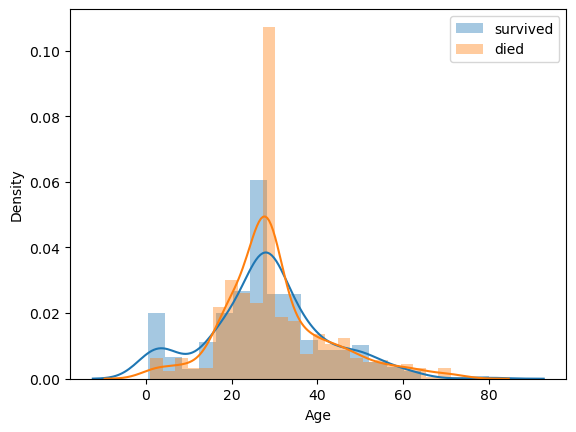

In [27]:
age_survived = df_train.loc[df_train['Survived'] == 1, 'Age']
age_died = df_train.loc[df_train['Survived'] == 0, 'Age']
sns.distplot(age_survived, label = 'survived')
sns.distplot(age_died, label = 'died')
plt.legend()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

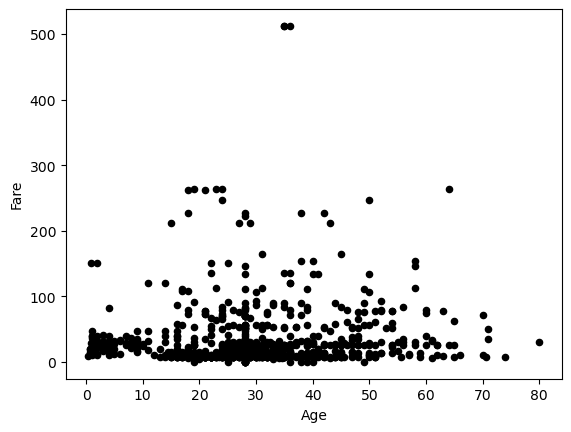

In [28]:
df_train.plot.scatter(x = 'Age', y = 'Fare', c = 'black')

(-0.5, 2.5, 0.0, 600.0)

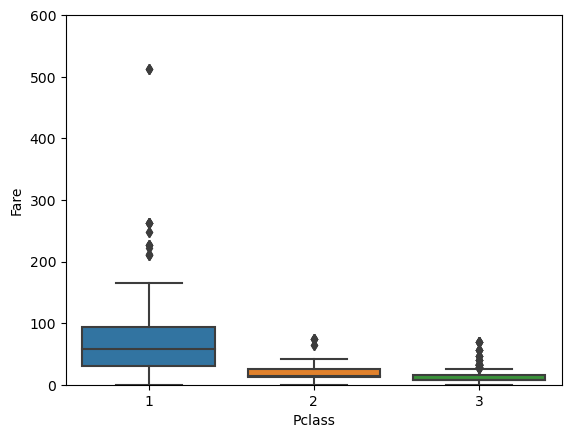

In [30]:
fig = sns.boxplot(x = 'Pclass', y = 'Fare', data = df_train)
fig.axis(ymin = 0, ymax = 600)

<AxesSubplot:>

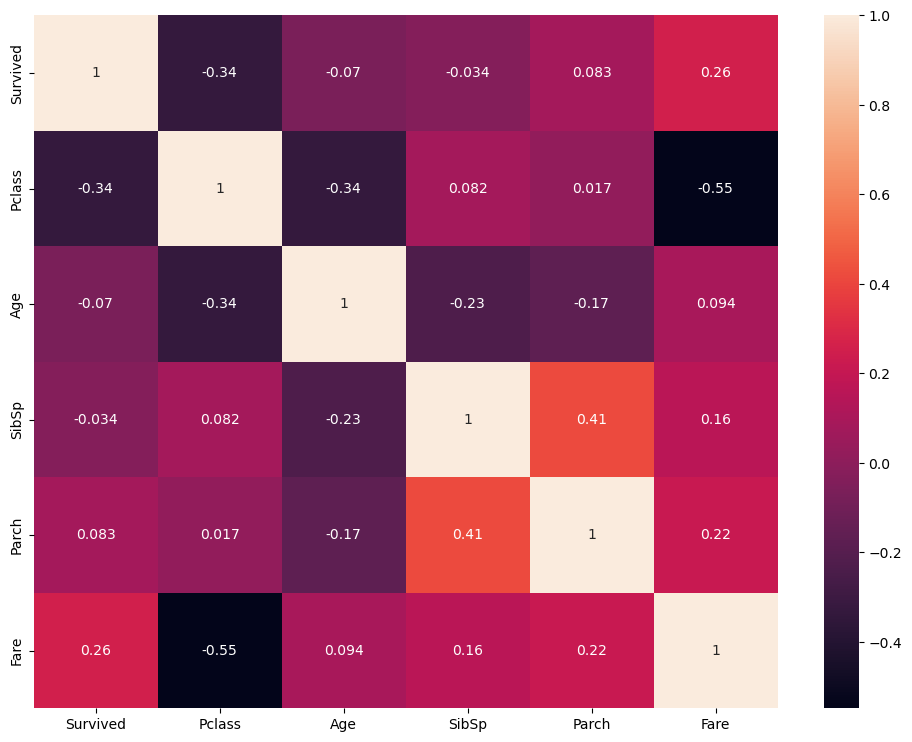

In [31]:
corr = df_train.corr()
f = plt.figure(figsize = (12, 9))
sns.heatmap(corr, annot = True)

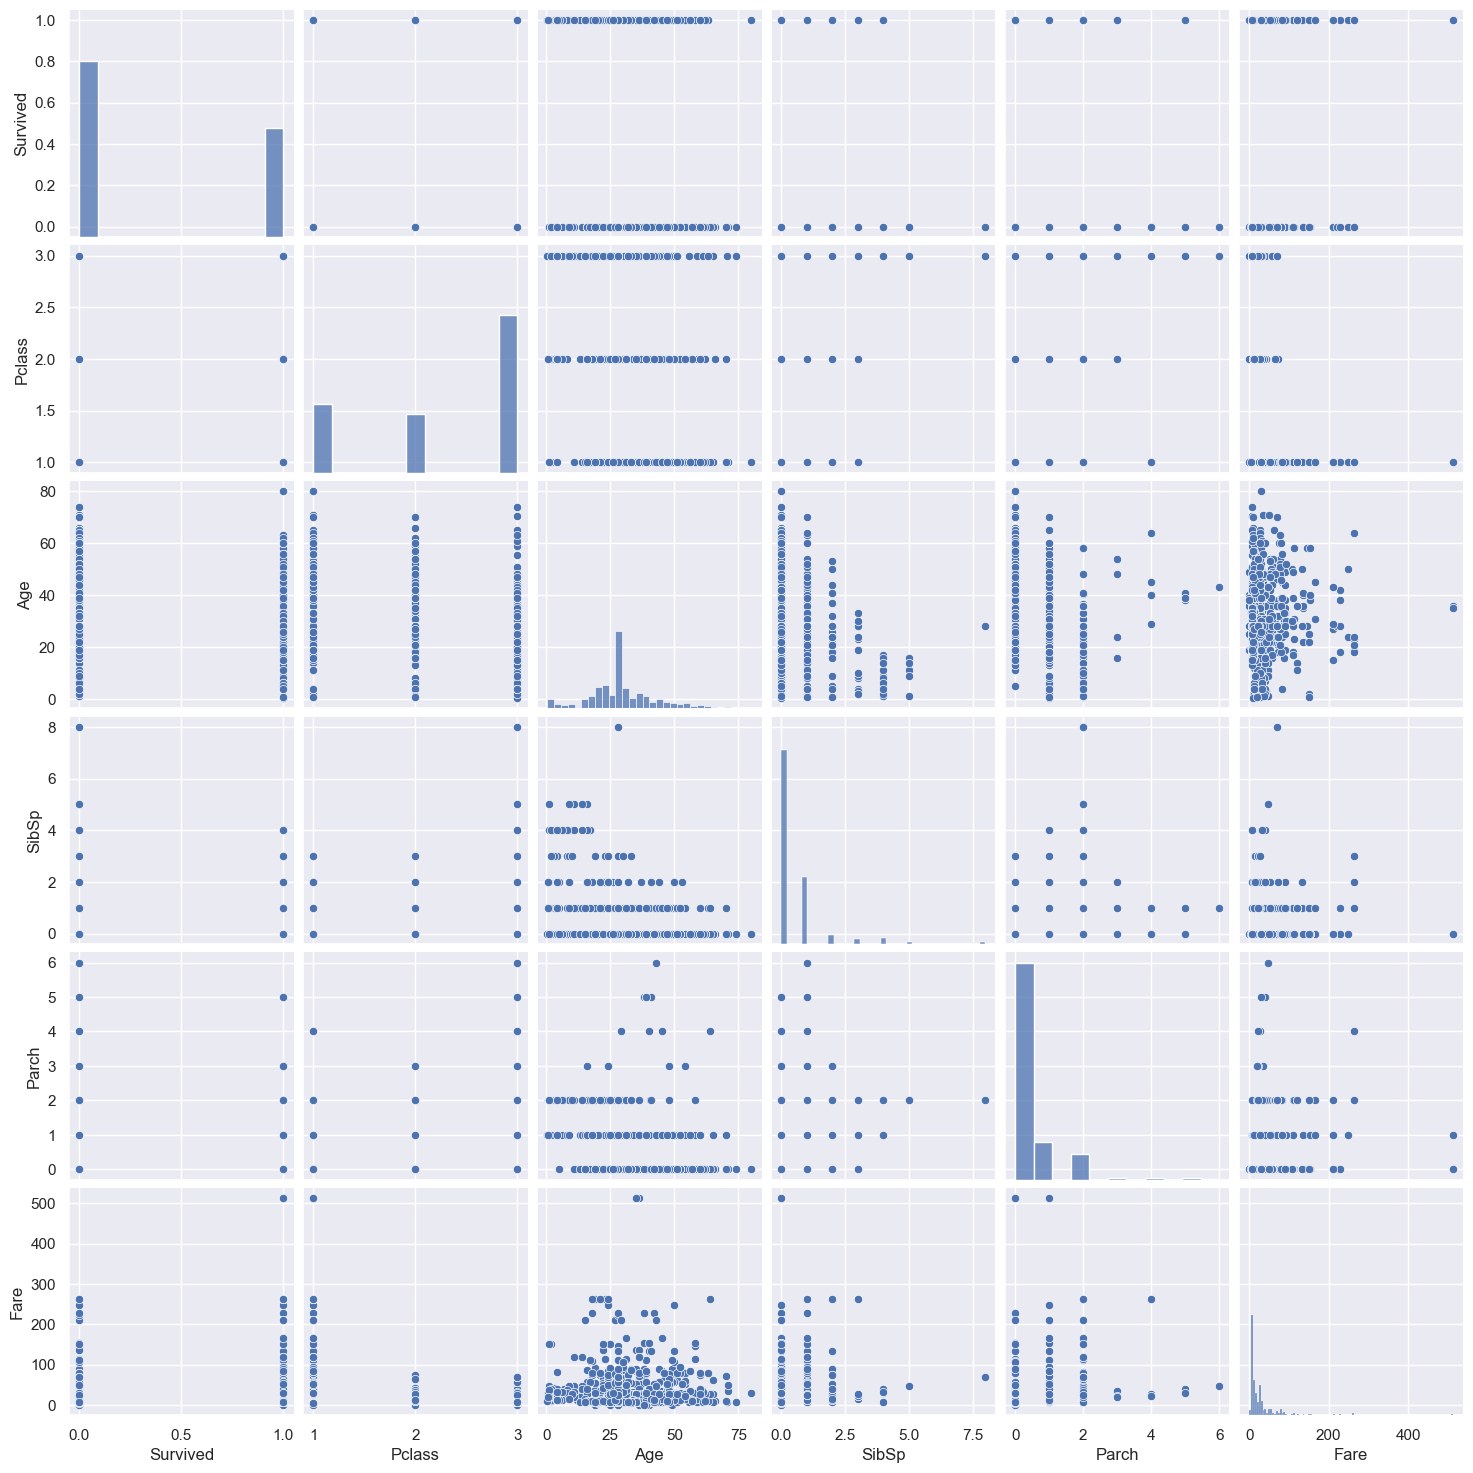

In [33]:
sns.set()
sns.pairplot(df_train, height = 2.5)
plt.show()

In [36]:
categorical_feats = np.concatenate((df_train.dtypes[df_train.dtypes == 'int64'].index, df_train.dtypes[df_train.dtypes == 'object'].index))
print('Number of categorical features: ', len(categorical_feats))

for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)

Number of categorical features:  6
0    549
1    340
Name: Survived, dtype: int64
##################################################
3    491
1    214
2    184
Name: Pclass, dtype: int64
##################################################
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
##################################################
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
##################################################
male      577
female    312
Name: Sex, dtype: int64
##################################################
S    644
C    168
Q     77
Name: Embarked, dtype: int64
##################################################


In [37]:
pd.crosstab(df_train['Pclass'], df_train['Sex']).style.background_gradient(cmap = 'summer_r')

Sex,female,male
Pclass,,
1,92,122
2,76,108
3,144,347


In [38]:
pd.crosstab(df_train['Pclass'], df_train['Survived']).style.background_gradient(cmap = 'summer_r')

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass', ylabel='count'>

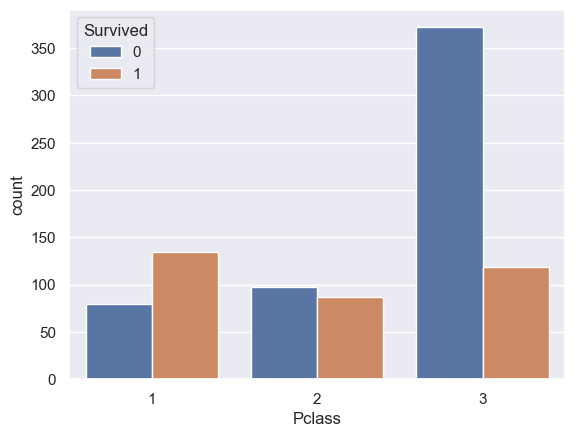

In [40]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

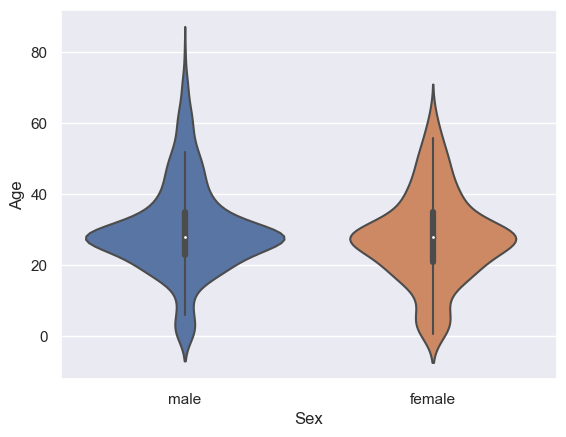

In [41]:
sns.violinplot(x = 'Sex', y = 'Age', data = df_train)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

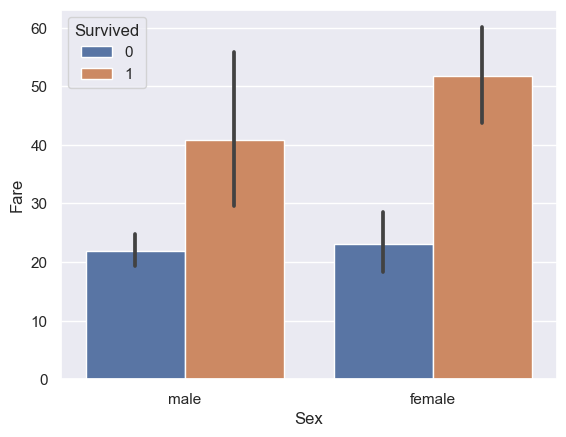

In [43]:
sns.barplot(x = 'Sex', y = 'Fare', hue = 'Survived', data = df_train)

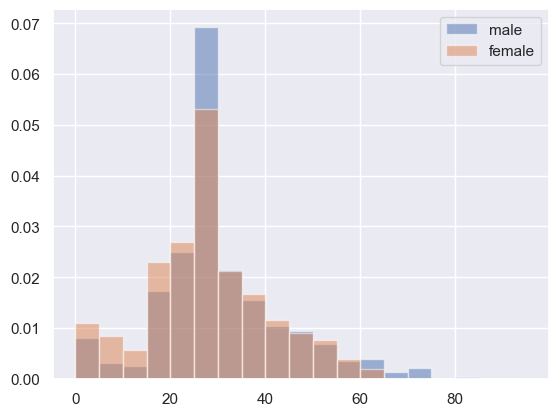

In [45]:
hist_a = plt.hist(df_train.loc[df_train['Sex'] == 'male', 'Age'], bins = np.arange(0,100,5), alpha = .5, density = True, label = 'male')
hist_b = plt.hist(df_train.loc[df_train['Sex'] == 'female', 'Age'], bins = np.arange(0,100,5), alpha = .5, density = True, label = 'female')
plt.legend()